In [1]:
import urllib.request as rq
import requests
from bs4 import BeautifulSoup
import ssl
import json
import pandas as pd 
import bs4
from IPython.display import FileLink
import pandas as pd
import re
from tabulate import tabulate
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#爬取網頁內容:
objects = []
for n in range (1,13):
  url = "https://www.rakuya.com.tw/search/rent_search/index?display=list&con=eJyrVkrOLKlUsopWMlCK1VFKySwuyEkE8pVyMotLlHSU8pOyMvNSQPJBIPni1MSi5AwQF6wNKFJanJqcn5IKErIAqrcEiVVlFsDEDA0MgKKGBmYg0tBMKbYWANIMIOI&tab=def&sort=11&ds=&page="+str(n)
  ssl._create_default_https_context = ssl._create_unverified_context
  req = rq.Request(url, headers={"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"})
  with rq.urlopen(req) as response:
    data=response.read().decode("utf-8")
#<div class="obj-info">
  soup = BeautifulSoup(data, "html.parser")
  Pageobject = soup.find_all("div", class_="obj-info")
  objects.append(Pageobject)
print(objects)

[[<div class="obj-info">
<div class="obj-title">
<h6><a data-score="14000" href="https://www.rakuya.com.tw/rent_item/info?ehid=0cdde020745253a" target="_blank">F0A78）捷運萬芳醫院【超值租案】流理台★採光佳</a></h6>
<p class="obj-address">台北市文山區仙岩路</p>
</div>
<i class="obj-status fa fa-user online">線上</i>
<ul class="obj-data clearfix">
<li class="obj-price">
<span>12,000元</span>
</li>
<li class="clearfix">
<span>獨立套房/公寓</span>
<span>1房1衛</span>
</li>
<li class="clearfix">
<span>6坪</span>
<span>5樓/8樓</span>
</li>
</ul>
<ul class="obj-icon clearfix">
</ul>
<ul class="obj-tag clearfix">
<li><a class="is-new">新上架</a></li> <li><a class="is-light" href="https://store.rakuya.com.tw/0972220227" target="_blank">嚴選</a></li> </ul>
<span class="obj-update">
                                                                  瀏覽次數：新上架                    </span>
</div>, <div class="obj-info">
<div class="obj-title">
<h6><a data-score="14000" href="https://www.rakuya.com.tw/rent_item/info?ehid=08bcd320740501c" target="_blan

In [3]:
#將所有資料統整到list，並使用pandas印出資料:
count = 0
objDict = []
for v in objects:
  for j in v:
    objArray = []
    title = j.find_all("a")
    adr = j.find_all("p", class_ = "obj-address")
    price = j.find_all("li", class_ = "obj-price")
    detail = j.find_all("li", class_ = "clearfix")
    for i in title:
      if i.string != "新上架":
        if i.string != "嚴選":
          if i.string != "優質":
            objArray.append (i.string)
    for i in adr:
      objArray.append (i.string)
    for i in price:
      for k in i.find_all("span"):
        price2 = (k.string)
        objArray.append (price2)
    for i in detail:
      for k in i.find_all("span"):
        detail2 = (k.string)
        objArray.append(detail2)
    objDict.append(objArray)
    for x in title:
      link = x.get('href')
      if link != None:
        if "https://www.rakuya.com.tw/rent_item" in link:
          objArray.append(link)
    count = count + 1
print("共有",count,"個物件！")
for u in objDict:
  u[0] = re.sub(r"[A-Z].+\）", "",u[0])
for u in objDict:
    u[2] = re.sub(r"元", "",u[2])
    u[2] = re.sub(r"\,", "",u[2])
    u[2] = int(u[2])
    u[2] = u[2]/1000
    u[2] = round(u[2])
for u in objDict:
    u[5] = re.sub(r"坪", "",u[5])
    u[5] = float(u[5])
    u[5] = round(u[5])
df = pd.DataFrame(objDict)
df

共有 132 個物件！


,0,1,2,3,4,5,6,7
0,捷運萬芳醫院【超值租案】流理台★採光佳,台北市文山區仙岩路,12,獨立套房/公寓,1房1衛,6,5樓/8樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
1,捷運東門1分【電梯獨戶】新裝潢★大空間,台北市中正區信義路二段,28,獨立套房/電梯大廈,1房1衛,11,5樓/10樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
2,捷運麟光2分【專屬女性】陽台★大面採光,台北市大安區和平東路三段,12,獨立套房/電梯大廈,1房1衛,5,7樓/7樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
3,捷運信義安和4分【垃圾代收】全新★超值,台北市大安區信義路四段,11,獨立套房/公寓,1房1衛,6,2樓/7樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
4,捷運信義安和站【精緻裝潢大空間】採光佳,台北市大安區通化街,14,獨立套房/公寓,1房1衛,7,5樓/5樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
...,...,...,...,...,...,...,...,...
127,璞趣紀念堂美套房,台北市中正區羅斯福路一段,30,獨立套房/其他,1房1衛,11,4樓/14樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
128,捷運高景觀6年飯店式全配含稅含網,台北市中正區中華路一段,45,獨立套房/電梯大廈,1房1廳1衛,18,7樓~7樓/15樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
129,可短租合租有陽台大套房,台北市文山區景興路,25,分租套房/其他,1房1廳1衛,8,2樓/10樓,https://www.rakuya.com.tw/rent_item/info?ehid=...
130,臨紀念堂高樓明亮套房,台北市中正區羅斯福路一段,24,獨立套房/其他,1房1廳1衛,14,12樓/12樓,https://www.rakuya.com.tw/rent_item/info?ehid=...


師大周邊租屋搜尋系統。請輸入數字功能:
1.將所有物件以pandas呈現
2.依租金/坪數排序(顯示前30筆資料)
3.標題關鍵字搜尋
4.依據需求條件，給予推薦
5.生成標題文字雲
0.結束程式
5


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/4g/31yhc28117x888vbkzwq53600000gn/T/jieba.cache
Loading model cost 0.476 seconds.
Prefix dict has been built successfully.


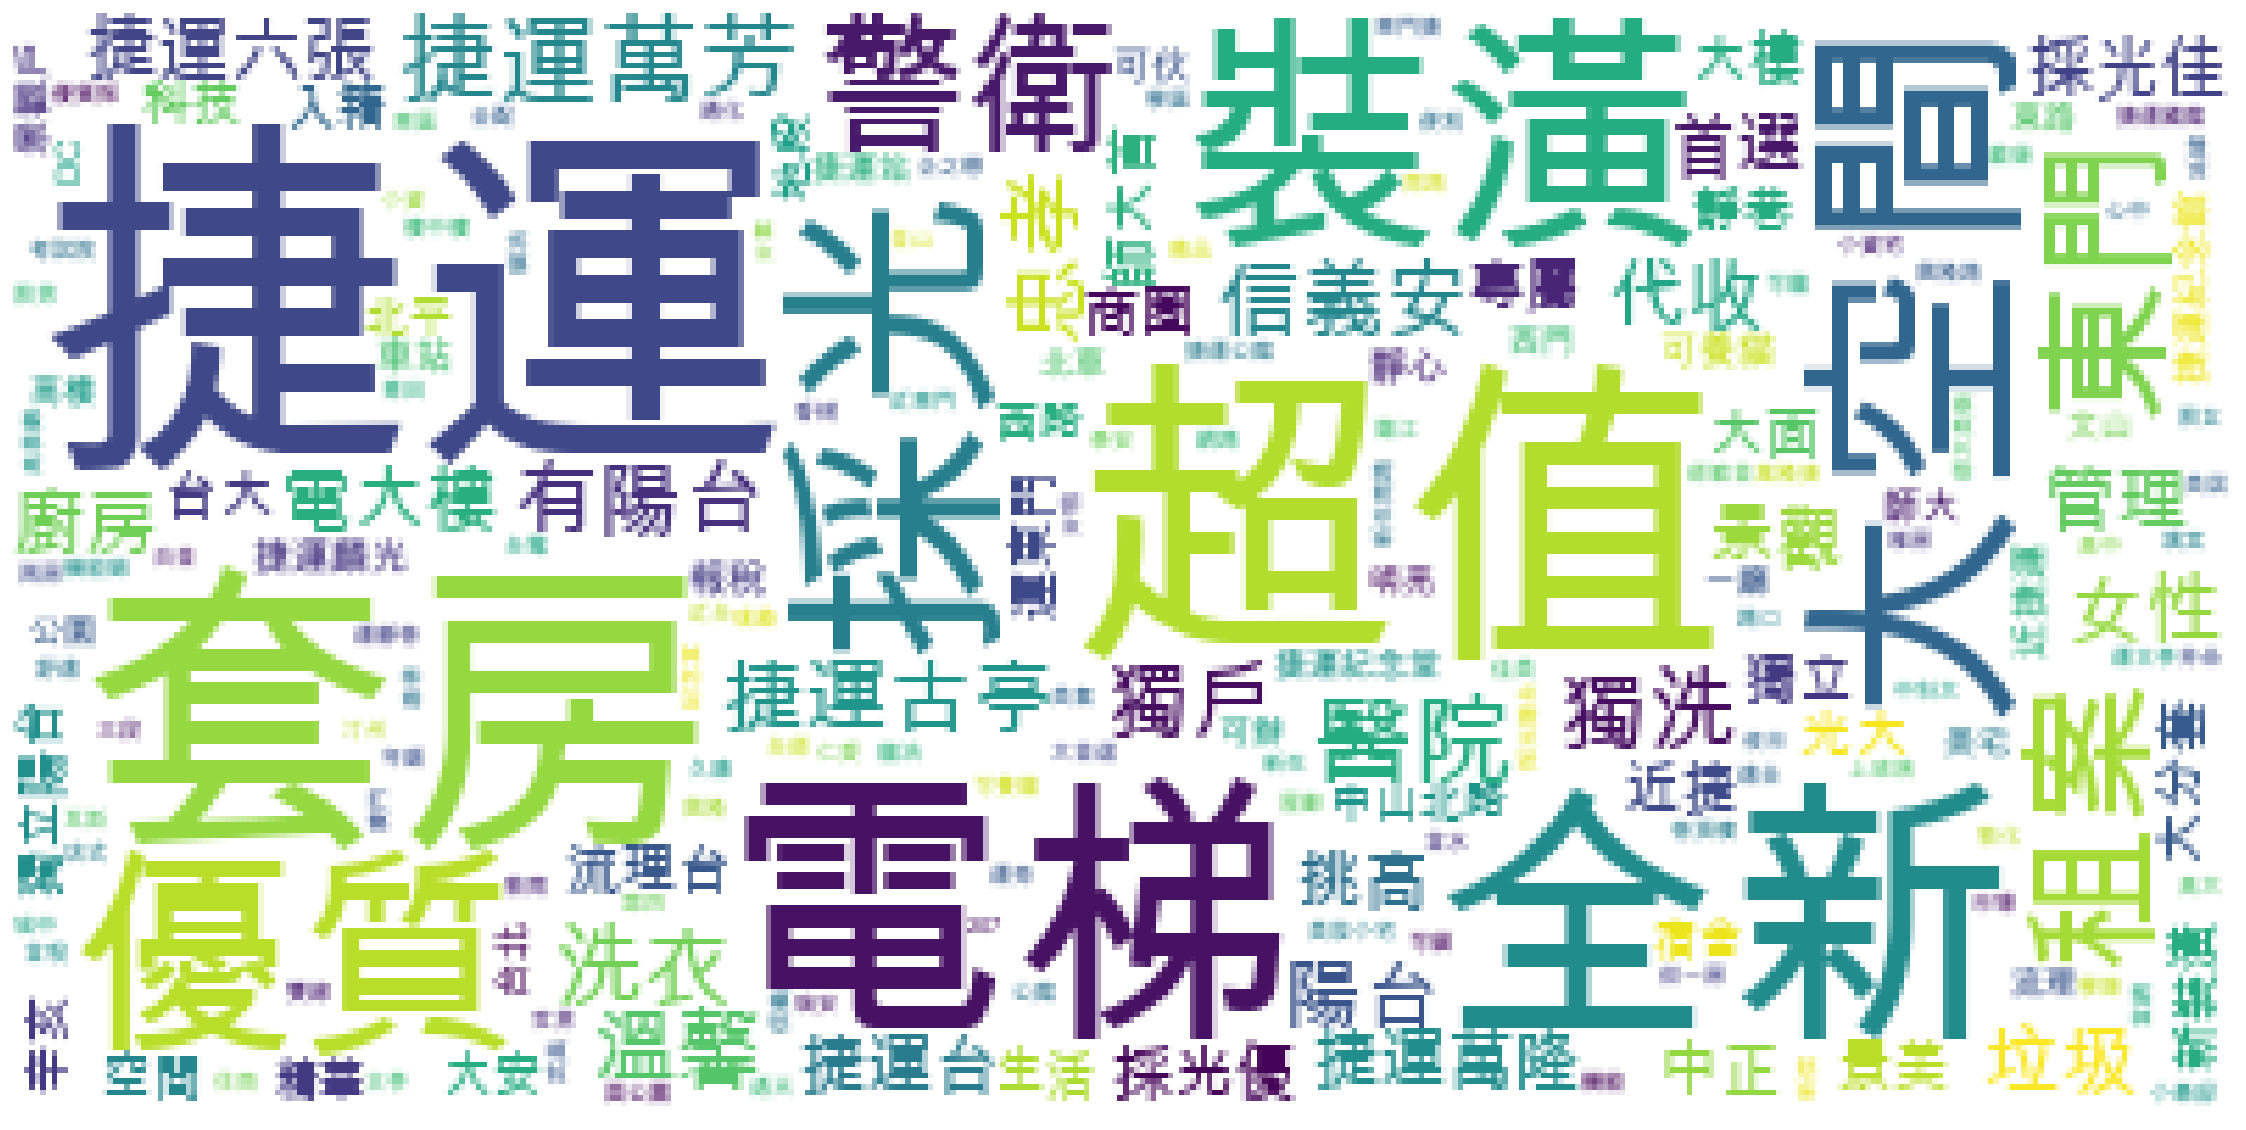

師大周邊租屋搜尋系統。請輸入數字功能:
1.將所有物件以pandas呈現
2.依租金/坪數排序(顯示前30筆資料)
3.標題關鍵字搜尋
4.依據需求條件，給予推薦
5.生成標題文字雲
0.結束程式
4
請輸入性別(男/女)，以排除限男或限女;不回答請輸入1
g
輸入錯誤，請重新輸入
請輸入性別(男/女)，以排除限男或限女;不回答請輸入1
ㄢ
輸入錯誤，請重新輸入
請輸入性別(男/女)，以排除限男或限女;不回答請輸入1
男
請輸入理想租金，單位：K(千元)
14
請輸入理想坪數，單位：坪
8
您的推薦資料:
+-----------------------------------------+--------------------------+----------------+-------------------+----------------------+-----------------+---------------+---------------------------------------------------------------+
| 物件名稱                                | 地址                     |   租金(單位:k) | 類型              | 房間/衛浴/客廳數量   |   坪數(單位:坪) | 樓層/共幾樓   | 租屋網址                                                      |
|-----------------------------------------+--------------------------+----------------+-------------------+----------------------+-----------------+---------------+---------------------------------------------------------------|
| 捷運萬芳醫院【超值電梯】有警衛★有陽台   | 台北市文山區興隆路二段   |             14 | 獨立套房/電梯大廈 | 1房1衛               |

In [4]:
#使用者互動！
while True:
    m = input("師大周邊租屋搜尋系統。請輸入數字功能:\n1.將所有物件以pandas呈現\n2.依租金/坪數排序(顯示前30筆資料)\n3.標題關鍵字搜尋\n4.依據需求條件，給予推薦\n5.生成標題文字雲\n0.結束程式\n")
    if m == "1":
      with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        print(tabulate(df, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))
    elif m== "2":
      while True:
        sortIn = input("請輸入排序方式：1.租金 2.坪數 0.回主選單")
        if sortIn == "1":
          sortIn1 = input("請選擇租金由1.小到大2.大到小")
          if sortIn1 == "1":
            sortFX = sorted(objDict,key=lambda x: x[2])
            sortFX1=[]
            for i in range (30):
              sortFX1.append(sortFX[i])
            print(tabulate(sortFX1, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))
          elif sortIn1 == "2":
            sortFX = sorted(objDict,key=lambda x: x[2], reverse=True)
            sortFX1=[]
            for i in range (30):
              sortFX1.append(sortFX[i])
            print(tabulate(sortFX1, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))      
          else:
            print("輸入錯誤，請重新輸入")
            break
        elif sortIn == "2":
          sortIn1 = input("請選擇坪數由1.小到大2.大到小")
          if sortIn1 == "1":
            sortFX = sorted(objDict,key=lambda x: x[5])
            sortFX1=[]
            for i in range (30):
              sortFX1.append(sortFX[i])
            print(tabulate(sortFX1, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))
          elif sortIn1 == "2":
            sortFX = sorted(objDict,key=lambda x: x[5], reverse=True)
            sortFX1=[]
            for i in range (30):
              sortFX1.append(sortFX[i])
            print(tabulate(sortFX1, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))      
          else:
            print("輸入錯誤，請重新輸入")
            break
        elif sortIn == "0":
          break
        else:
          print("輸入錯誤，請重新輸入！")
    elif m=="3":
        while True:
          search = input("請輸入欲搜尋之關鍵字，輸入0返回主列表(不知道要用什麼關鍵字？歡迎使用文字雲功能！)：\n")
          if search != "0" :
            searchList = []
            temp = 0
            for i in objDict:
              if search in i[0]:
                searchList.append(i)
                temp = temp+1
            if temp != 0:
              print(tabulate(searchList, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))
            if temp == 0:
              print("抱歉，沒有該關鍵字的資料，請重新輸入。")
          else:
            break
    elif m=="4":
      while True:
        print("請輸入性別(男/女)，以排除限男或限女;不回答請輸入1")
        gender = input()
        objDict4 = []
        if gender == "男":
          for i in objDict:
            if not "女" in i[0]:
              objDict4.append(i)
          break
        elif gender == "女":
          for i in objDict:
            if not "男" in i[0]:
              objDict4.append(i)
          break
        elif gender == "1":
          objDict4 = objDict
          break
        else:
          print("輸入錯誤，請重新輸入")
      print("請輸入理想租金，單位：K(千元)")
      rent = input()
      rent = float(rent)
      print("請輸入理想坪數，單位：坪")
      ping = input()
      ping = float(ping)
      score = []
      for g in range(len(objDict4)):
        score.append([g,300])
        score[g][1]=score[g][1]-abs(rent-objDict4[g][2])
        score[g][1]=score[g][1]-(2*abs(ping-objDict4[g][5]))
      score = sorted(score,key=lambda x: x[1], reverse=True)
      final = []
      for y in range(30):
        final.append(objDict4[(score[y][0])])
      print("您的推薦資料:")
      print(tabulate(final, headers=["物件名稱","地址","租金(單位:k)","類型","房間/衛浴/客廳數量","坪數(單位:坪)","樓層/共幾樓","租屋網址"], tablefmt='psql'))
    elif m=="0":
        print("感謝您的使用，程式結束！資料來源：樂屋網")
        break
    elif m=="5":
      allwords = []
      for content in objDict:
        allwords.append(content[0])
      alljie = [] 
      for i in allwords:
        seg = jieba.analyse.extract_tags(i, 20)
        alljie.append(seg)
      flat = [x for sublist in alljie for x in sublist]
      diction = Counter(flat)
      font = "Arial Unicode.ttf"
      #mask = numpy.array(Image.open("下載 (12).png"))
      wordcloud = WordCloud(background_color = "white", font_path=font)#, mask = mask)#, mask = mask)
      wordcloud.generate_from_frequencies(diction)
      plt.figure(figsize=(40,40))
      plt.imshow(wordcloud)
      plt.axis("off")
      plt.show()
      
    else:
        print("輸入錯誤，請重新輸入")
        print()